## SWE Analysis over Sierra Nevada Range using four models for a given season

In [ ]:
SWE: Snow Water Equivalence

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

### Loading Datasets

In [4]:
# SWE wrf datasets
ds_wrf_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_wrf.daily.swe.1980-2012.nc')
ds_wrf_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_wrf.daily.swe.2091-2100.nc')

# SWE loca_wrf
ds_loca_wrf_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_wrf.daily.swe.1980-2012.nc')
ds_loca_wrf_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_wrf.daily.swe.2091-2100.nc')

# SWE _loca_14
ds_loca_14_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_L14.daily.swe.1980-2012.nc')
ds_loca_14_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_L14.daily.swe.2091-2100.nc')

# SWE _bcsd_L14
ds_bcsd_L14_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_BCSD_L14.daily.swe.1980-2012.nc')
ds_bcsd_L14_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_BCSD_L14.daily.swe.2091-2100.nc')

In [5]:
ds_wrf_1980

<xarray.Dataset>
Dimensions:         (latitude: 128, longitude: 112, nb2: 2, time: 12054)
Coordinates:
  * longitude       (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude        (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...
  * time            (time) datetime64[ns] 1980-01-01 1980-01-02 1980-01-03 ...
Dimensions without coordinates: nb2
Data variables:
    longitude_bnds  (longitude, nb2) float32 ...
    latitude_bnds   (latitude, nb2) float32 ...
    swe             (time, latitude, longitude) float32 ...
Attributes:
    CDI:                Climate Data Interface version 1.6.1 (http://code.zma...
    Conventions:        GDT 1.2
    history:            Fri Jan 19 21:18:52 2018: cdo -O mergetime /data5/ema...
    institution:        DOE, Santa Clara University
    file_name:          DOE_VIC.narr_wrf.daily.swe.1980.nc
    History:            Archived 2017
    authors:            Maurer, E., SCU
    description:        Daily VIC Output
    creation_date

In [6]:
scf_wrf_1991 = ds_wrf_1980['swe'].sel(time=slice('1991-04-01', '2000-12-31'))
scf_loca_wrf_1991 = ds_loca_wrf_1980['swe'].sel(time=slice('1991-04-01', '2000-12-31'))
scf_loca_14_1991 = ds_bcsd_L14_1980['swe'].sel(time=slice('1991-04-01', '2000-12-31'))
scf_bcsd_L14_1991 = ds_bcsd_L14_1980['swe'].sel(time=slice('1991-01-01', '2000-12-31'))

### Setting up the date range

In [7]:
# Creating a pandas datetime range to collect data every year on April 1st
# resource: https://stackoverflow.com/questions/32168848/how-to-create-a-pandas-datetimeindex-with-year-as-frequency

past_range = pd.date_range('1991-04-01', periods=10, freq=pd.DateOffset(years=1))
future_range = pd.date_range('2091-04-01', periods=10, freq=pd.DateOffset(years=1))

### Mean difference of narr_wrf

In [9]:
combined_scf_wrf_past = xr.concat([i for i in [scf_wrf_1991.sel(time=date) for date in past_range]], 'time')
combined_scf_wrf_future = xr.concat([i for i in [ds_wrf_2091['swe'].sel(time=date) for date in future_range]], 'time')
combined_scf_wrf_future


<xarray.DataArray 'swe' (time: 10, latitude: 128, longitude: 112)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude   (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...
  * time       (time) datetime64[ns] 2091-04-01 2092-04-01 2093-04-01 ...
Attributes:
    long_name:  snow_water_equivalent
  

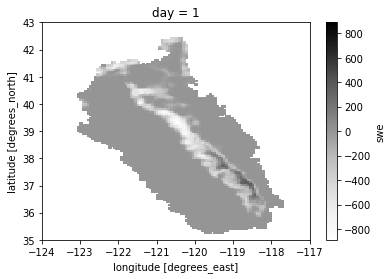

In [12]:
wrf_res = (combined_scf_wrf_future.groupby('time.day').median('time') - combined_scf_wrf_past.groupby('time.day').median('time'))
wrf_res.plot(cmap='Greys')

### Mean difference of narr_loca_wrf

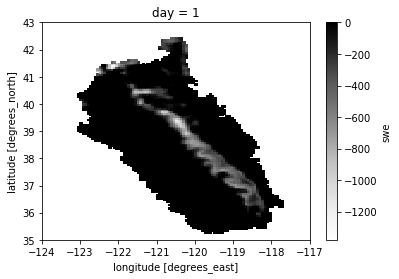

In [13]:
combined_scf_loca_wrf_past = xr.concat([i for i in [scf_loca_wrf_1991.sel(time=date) for date in past_range]], 'time')
combined_scf_loca_wrf_future = xr.concat([i for i in [ds_loca_wrf_2091['swe'].sel(time=date) for date in future_range]], 'time')


loca_wrf_res = (combined_scf_loca_wrf_future.groupby('time.day').median('time') - combined_scf_loca_wrf_past.groupby('time.day').median('time'))
loca_wrf_res.plot(cmap='Greys')

### Mean difference of narr_loca_14

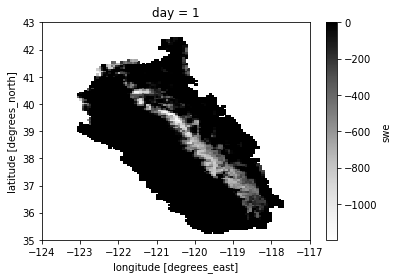

In [15]:
combined_scf_loca_14_past = xr.concat([i for i in [scf_loca_14_1991.sel(time=date) for date in past_range]], 'time')
combined_scf_loca_14_future = xr.concat([i for i in [ds_loca_14_2091['swe'].sel(time=date) for date in future_range]], 'time')

loca_14_res = (combined_scf_loca_14_future.groupby('time.day').median('time') - combined_scf_loca_14_past.groupby('time.day').median('time'))
loca_14_res.plot(cmap='Greys')

### Mean difference of narr_bcsd_14

In [17]:
combined_scf_bcsd_L14_past = xr.concat([i for i in [scf_bcsd_L14_1991.sel(time=date) for date in past_range]], 'time')
combined_scf_bcsd_L14_future = xr.concat([i for i in [ds_bcsd_L14_2091['swe'].sel(time=date) for date in future_range]], 'time')



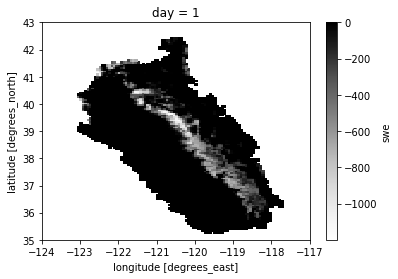

In [18]:
bcsd_res = (combined_scf_bcsd_L14_future.groupby('time.day').median('time') - combined_scf_bcsd_L14_past.groupby('time.day').median('time'))
bcsd_res.plot(cmap='Greys')